**Content Based Filtering**

In [42]:
# For Basic Operations
import numpy as np
import pandas as pd

# for Datetime Manipulation
import datetime

# For Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for Interactive Analysis
from ipywidgets import interact

In [43]:
movies = pd.read_csv('dataset\\movies.csv')
movies.shape

(9125, 3)

In [44]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
# check rating dataset
ratings = pd.read_csv("dataset\\ratings.csv")
ratings.shape

(100836, 4)

In [46]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [47]:
# as we are going to perform content based filtering merge rating and movies data 
data = pd.merge(movies,ratings,on = 'movieId',how = 'inner')
data.shape

(96811, 6)

In [48]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [49]:
# not require UserId timestamp movieId
data = data.drop(['movieId', 'userId', 'timestamp'], axis = 1)
data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [50]:
# groupby dataset based on movie Title
data = pd.pivot_table(data,index=['title','genres'],aggfunc='mean')
data.reset_index(level = ['title','genres'],inplace=True)
data.head(10)

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471
5,'night Mother (1986),Drama,3.000000
6,(500) Days of Summer (2009),Comedy|Drama|Romance,3.666667
7,*batteries not included (1987),Children|Comedy|Fantasy|Sci-Fi,3.285714
8,...And Justice for All (1979),Drama|Thriller,3.166667
9,1-900 (06) (1994),Drama|Romance,4.000000


c:\users\sarry\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


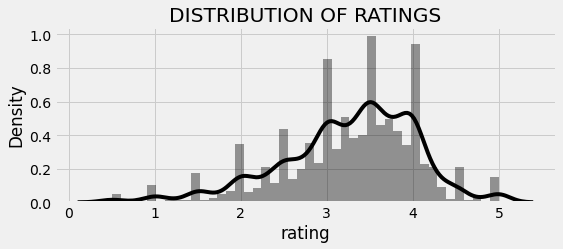

In [51]:
# check distribution of rating across the movies
plt.rcParams['figure.figsize']=(8,3)
plt.style.use('fivethirtyeight')

sns.distplot(data['rating'],color='black')
plt.title('DISTRIBUTION OF RATINGS')
plt.show()

In [52]:
# extract year of release from movie title
data['y']=data['title'].str.split(' ')
data['year']=data['y'].apply(lambda x:x[-1])

data = data.drop(['y'],axis=1)
data

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,(2004)
1,'Round Midnight (1986),Drama|Musical,3.500000,(1986)
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,(2004)
3,'Til There Was You (1997),Drama|Romance,4.000000,(1997)
4,"'burbs, The (1989)",Comedy,3.176471,(1989)
...,...,...,...,...
7067,eXistenZ (1999),Action|Sci-Fi|Thriller,3.863636,(1999)
7068,xXx (2002),Action|Crime|Thriller,2.770833,(2002)
7069,xXx: State of the Union (2005),Action|Crime|Thriller,2.000000,(2005)
7070,¡Three Amigos! (1986),Comedy|Western,3.134615,(1986)


In [53]:
data['year'].value_counts()

(2002)    244
(1996)    240
(1995)    228
(2001)    227
(2000)    225
(1998)    225
(1999)    221
(1997)    217
(2004)    206
(2006)    204
(1994)    198
(2003)    197
(2005)    195
(2007)    195
(2009)    190
(2008)    189
(2011)    180
(2010)    179
(2014)    170
(1993)    166
(2013)    166
(2012)    160
(2015)    148
(1988)    133
(1992)    127
(1987)    123
(1990)    117
(1989)    115
(1986)    115
(1991)    111
(1985)    105
(1984)     77
(1982)     71
(1983)     67
(1981)     64
(1980)     63
(2016)     52
(1979)     48
(1977)     47
(1978)     46
(1973)     41
(1974)     39
(1971)     33
(1975)     32
(1955)     32
(1965)     32
(1959)     32
(1962)     32
(1976)     31
(1964)     31
(1972)     30
(1966)     30
(1960)     30
(1963)     29
(1967)     28
(1968)     28
(1957)     26
(1953)     26
(1961)     25
(1958)     24
(1970)     23
(1956)     22
(1969)     22
(1954)     20
(1942)     20
(1939)     20
(1947)     17
(1940)     17
(1946)     16
(1951)     16
(1950)     16
(1948)

In [54]:
# remove opening and closing brackets in year
data['year'] = data['year'].str.strip(')')
data['year'] = data['year'].str.strip('(')

In [55]:
# check value after extraction
pd.set_option('max_rows',11)
data['year'].value_counts()

2002    244
1996    240
1995    228
2001    227
2000    225
       ... 
1915      1
1920      1
1921      1
Road      1
          1
Name: year, Length: 103, dtype: int64

In [56]:
# remove some Dirty Values
data['year'] = data['year'].replace(('2007-','Despot','Things', '1975-1979','Road', ''),('2007','2016','2016','1979','2002','1996'))

# convert the year column into Integer data type
data['year'] = data['year'].astype(int)

# head of the dataset again
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [57]:
# filter movies based on the genres
print('First Release Year : ',data['year'].min())
print('Last Release Year : ',data['year'].max())

First Release Year :  1902
Last Release Year :  2016


In [58]:
# check latest movies - (last year mentioned in dataset is 2016)
data[data['year']==2016][['title','rating']].sort_values(by='rating' , ascending=False).head(10).reset_index(drop=True).style.background_gradient(cmap = 'Wistia')
# sort in descending order and get 10 movies

,title,rating
0,Ice Age: The Great Egg-Scapade (2016),5.000000
1,Piper (2016),4.500000
2,Pride and Prejudice and Zombies (2016),4.500000
3,Shin Godzilla (2016),4.000000
4,Zootopia (2016),3.890625
5,Sherlock: The Abominable Bride (2016),3.850000
6,Deadpool (2016),3.833333
7,The Nice Guys (2016),3.833333
8,Sing Street (2016),3.833333
9,10 Cloverfield Lane (2016),3.678571


In [59]:
# checking movies with (==5) and (<=1) star reviews
print('Number of Movies that received 5 star reviews : ', data[data['rating']==5]['title'].count())
print('Percentage of movies getting 5 star reveiws : {0:.2f}%'.format( (data[data['rating']==5]['title'].count())/data.shape[0] ))

print('Number of Movies that less than or equal to 1 star reviews : ', data[data['rating']<=1]['title'].count())
print('Percentage of Movies that less than or equal to 1 star reviews  : {0:.2f}%'.format( (data[data['rating']<1]['title'].count())/data.shape[0] ))


Number of Movies that received 5 star reviews :  108
Percentage of movies getting 5 star reveiws : 0.02%
Number of Movies that less than or equal to 1 star reviews :  115
Percentage of Movies that less than or equal to 1 star reviews  : 0.01%


In [60]:
# check genres
pd.set_option('max_rows',110)
data['genres']

0       Action|Adventure|Comedy|Documentary|Fantasy
1                                     Drama|Musical
2                     Drama|Horror|Mystery|Thriller
3                                     Drama|Romance
4                                            Comedy
                           ...                     
7067                         Action|Sci-Fi|Thriller
7068                          Action|Crime|Thriller
7069                          Action|Crime|Thriller
7070                                 Comedy|Western
7071                                 Comedy|Musical
Name: genres, Length: 7072, dtype: object

In [61]:
# Interactive function to get the list of best movies from each genre
@interact
def genre(Genre = ['Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance','Sci-Fi', 'Thriller', 'War', 'Western'], year = 2000):
    x = data['genres'].str.split('|')
    d = data.drop(['genres'], axis = 1)
    x = pd.concat([d, x], axis = 1)
    x = x.explode('genres')
    x= x[(x['genres'] == Genre) & (x['year'] >= year)][['title', 'rating', 'year']].sort_values(by = 'rating',
                            ascending = False).reset_index(drop = True).head(10)
    return x

interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Animation', 'Children', '…

In [62]:
def genre1(GenreInput, year = 2000):
    x = data['genres'].str.split('|')
    d = data.drop(['genres'], axis = 1)
    x = pd.concat([d, x], axis = 1)
    x = x.explode('genres')
    x= x[(x['genres'] == GenreInput) & (x['year'] >= year)][['title', 'rating', 'year']].sort_values(by = 'rating',
                            ascending = False).reset_index(drop = True).head(10)
    print(GenreInput," MOVIE RELEASE IN NEARBY YEAR : ",year)
    return x

In [63]:
# Recommend Similar movies to watch
from mlxtend.preprocessing import TransactionEncoder
# split genres into transactions
genres = data['genres'].str.split('|')
genres

0       [Action, Adventure, Comedy, Documentary, Fantasy]
1                                        [Drama, Musical]
2                      [Drama, Horror, Mystery, Thriller]
3                                        [Drama, Romance]
4                                                [Comedy]
                              ...                        
7067                           [Action, Sci-Fi, Thriller]
7068                            [Action, Crime, Thriller]
7069                            [Action, Crime, Thriller]
7070                                    [Comedy, Western]
7071                                    [Comedy, Musical]
Name: genres, Length: 7072, dtype: object

In [64]:
# obj of TransactionEncoder
te = TransactionEncoder()

# transform data into transactions
genres = te.fit_transform(genres)

# converting transactions into a dataframe
genres = pd.DataFrame(genres, columns=te.columns_)
genres.head(3)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False


In [65]:
# convert bool to int so we perform calculations
genres = genres.astype(int)
genres.insert(0,'title',data['title'])
genres.head(3)

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,'Hellboy': The Seeds of Creation (2004),0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,'Round Midnight (1986),0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,'Salem's Lot (2004),0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [66]:
# transpose data as we have to find similar movies
genres = genres.transpose()
genres = genres.rename(columns=genres.iloc[0])
genres = genres.drop(genres.index[0])
genres = genres.astype(int)
genres

,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),...,Zoom (2006),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,0
Adventure,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Children,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Comedy,1,0,0,0,1,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,1
Crime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
Documentary,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drama,0,1,1,1,0,1,1,0,1,1,...,1,0,1,1,1,0,0,0,0,0
Fantasy,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
# make recommendation engine for getting similar movies
@interact
def recommendation_movie(movie = list(genres.columns)):    
    similar_movies = genres.corrwith(genres[movie])
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

interactive(children=(Dropdown(description='movie', options=("'Hellboy': The Seeds of Creation (2004)", "'Roun…

In [68]:
def recommendation_movie1(movie):    
    similar_movies = genres.corrwith(genres[movie])
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [69]:
recommendation_movie1('Iron Man (2008)')

Ant-Man (2015)                                          1.0
Superman (1978)                                         1.0
Serenity (2005)                                         1.0
Superman III (1983)                                     1.0
Fantastic Four (2005)                                   1.0
Independence Day: Resurgence (2016)                     1.0
Superman IV: The Quest for Peace (1987)                 1.0
Spacehunter: Adventures in the Forbidden Zone (1983)    1.0
Sky Captain and the World of Tomorrow (2004)            1.0
Terminator 3: Rise of the Machines (2003)               1.0
Avengers: Age of Ultron (2015)                          1.0
20,000 Leagues Under the Sea (1916)                     1.0
Demolition Man (1993)                                   1.0
Green Lantern (2011)                                    1.0
Guardians of the Galaxy (2014)                          1.0
Mad Max Beyond Thunderdome (1985)                       1.0
Mad Max (1979)                          

In [70]:
import pickle
pickle.dump(genres,open('movies.pkl','wb'))

In [71]:
pickle.dump(data,open('moviesOriginal.pkl','wb'))

In [72]:
genres.columns.shape

(7072,)

In [73]:
genres.index[1:].values

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

In [74]:
type(genres)

pandas.core.frame.DataFrame

In [75]:
# genres = genres.columns
genres = list(genres)
genres[3225]

'Iron Eagle (1986)'

In [76]:
for i in data['title']:
    print(i)

'Hellboy': The Seeds of Creation (2004)
'Round Midnight (1986)
'Salem's Lot (2004)
'Til There Was You (1997)
'burbs, The (1989)
'night Mother (1986)
(500) Days of Summer (2009)
*batteries not included (1987)
...And Justice for All (1979)
1-900 (06) (1994)
10 (1979)
10 Cloverfield Lane (2016)
10 Items or Less (2006)
10 Things I Hate About You (1999)
10 Years (2011)
10,000 BC (2008)
100 Girls (2000)
101 Dalmatians (1996)
101 Dalmatians (One Hundred and One Dalmatians) (1961)
101 Reykjavik (101 Reykjavík) (2000)
102 Dalmatians (2000)
10th Kingdom, The (2000)
11'09"01 - September 11 (2002)
11:14 (2003)
12 Angry Men (1957)
12 Angry Men (1997)
12 Years a Slave (2013)
127 Hours (2010)
13 Assassins (Jûsan-nin no shikaku) (2010)
13 Ghosts (1960)
13 Going on 30 (2004)
13 Tzameti (2005)
13th Warrior, The (1999)
1408 (2007)
15 Minutes (2001)
16 Blocks (2006)
17 Again (2009)
18 Again! (1988)
187 (One Eight Seven) (1997)
1941 (1979)
1984 (Nineteen Eighty-Four) (1984)
2 Days in New York (2012)
2 Days

Fools Rush In (1997)
Footloose (1984)
Footloose (2011)
For Love of the Game (1999)
For Love or Money (1993)
For Richer or Poorer (1997)
For Roseanna (Roseanna's Grave) (1997)
For Whom the Bell Tolls (1943)
For Your Consideration (2006)
For Your Eyes Only (1981)
For a Few Dollars More (Per qualche dollaro in più) (1965)
For a Good Time, Call... (2012)
For the Birds (2000)
For the Boys (1991)
For the Love of Benji (1977)
Forbidden Games (Jeux interdits) (1952)
Forbidden Kingdom, The (2008)
Forbidden Planet (1956)
Force 10 from Navarone (1978)
Forces of Nature (1999)
Foreign Correspondent (1940)
Forever Young (1992)
Forget Paris (1995)
Forgetting Sarah Marshall (2008)
Forgotten Silver (1996)
Forgotten, The (2004)
Formula 51 (2001)
Forrest Gump (1994)
Fortress (1992)
Foul Play (1978)
Fountain, The (2006)
Four Brothers (2005)
Four Christmases (2008)
Four Days in September (O Que É Isso, Companheiro?) (1997)
Four Feathers, The (2002)
Four Lions (2010)
Four Musketeers, The (1974)
Four Rooms (

Mrs. Parker and the Vicious Circle (1994)
Mrs. Winterbourne (1996)
Much Ado About Nothing (1993)
Mud (2012)
Mulan (1998)
Mulan II (2004)
Mulholland Drive (2001)
Mulholland Falls (1996)
Multiplicity (1996)
Mumford (1999)
Mummy Returns, The (2001)
Mummy, The (1932)
Mummy, The (1959)
Mummy, The (1999)
Mummy: Tomb of the Dragon Emperor, The (2008)
Munchies (1987)
Munich (2005)
Muppet Christmas Carol, The (1992)
Muppet Movie, The (1979)
Muppet Treasure Island (1996)
Muppets From Space (1999)
Muppets Most Wanted (2014)
Muppets Take Manhattan, The (1984)
Muppets, The (2011)
Murder at 1600 (1997)
Murder by Death (1976)
Murder by Numbers (2002)
Murder in the First (1995)
Murder on a Sunday Morning (Un coupable idéal) (2001)
Murder on the Orient Express (1974)
Murderball (2005)
Muriel's Wedding (1994)
Murphy's Romance (1985)
Musa the Warrior (Musa) (2001)
Muse, The (1999)
Music Box (1989)
Music From Another Room (1998)
Music Man, The (1962)
Music and Lyrics (2007)
Music of the Heart (1999)
Muske

Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)
Unbearable Lightness of Being, The (1988)
Unbreakable (2000)
Unbroken (2014)
Uncle Buck (1989)
Uncommon Valor (1983)
Under Siege (1992)
Under Siege 2: Dark Territory (1995)
Under Suspicion (2000)
Under the Rainbow (1981)
Under the Sand (2000)
Under the Skin (2013)
Under the Tuscan Sun (2003)
Undercover Blues (1993)
Undercover Brother (2002)
Underground (1995)
Underneath (1995)
Undertow (2004)
Underworld (1996)
Underworld (2003)
Underworld: Awakening (2012)
Underworld: Evolution (2006)
Underworld: Rise of the Lycans (2009)
Undisputed (2002)
Unfaithful (2002)
Unfaithfully Yours (1948)
Unfinished Business (2015)
Unfinished Life, An (2005)
Unforgettable (1996)
Unforgiven (1992)
Unforgiven, The (1960)
United 93 (2006)
Universal Soldier (1992)
Universal Soldier: The Return (1999)
Unknown (2011)
Unknown White Male (2005)
Unlawful Entry (1992)
Unleashed (Danny the Dog) (2005)
Unprecedented: The 2000 Presidential Election (2002)
